In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from evalutation.plotting.plotting import PLOTTER
from data_prep.data_preparation import DATA_PREP
from models.testing import EVALUATION

In [11]:
# LFP
lfp_csv_path = "../data/lfp_data/p66_lfpsc5c13c36c40c60c64c79sec0to1000_notch50.0_lowpass300.0.csv"
df_lfps = pd.read_pickle(lfp_csv_path)

# spikes
spikes_csv_path = "../data/spikes_data/p66_bin1ms.csv"
df_spikes = pd.read_pickle(spikes_csv_path)

In [4]:
pltr = PLOTTER()
dtprep = DATA_PREP()
evaltor = EVALUATION()

#save_name_lfps = f"data/{spike_type}/{csc}/pat66_lfps{spike_type}_df_{origin}_c{clip_size}_b{bin_size}.csv"
#save_name_spikes = f"data/{spike_type}/{csc}/pat66_spikes{spike_type}_df_b{bin_size}_c{clip_size}.csv"

cv_df = evaltor.load_split_data(splits, lfp_path, spike_path)
df_spikes = evaltor.load_split_data(lfp_path)

/home/rachel/Documents/lfp2spikes/modularized_code


FileNotFoundError: [Errno 2] No such file or directory: '../data_prep/data/SUA/channels_5-40/pat66_lfpsSUA_df_zscored_c(10, 1)_b10'

<Figure size 774x270 with 0 Axes>

In [4]:

spike_rate_10 = dtprep.bin_spikes(
    df_spikes, 
    stst_time['66'][2], 
    stst_time['66'][3], 
    bin_size = 10
)["bin10_cnt"].to_numpy()

spike_rate_20 = dtprep.bin_spikes(
    df_spikes, 
    stst_time['66'][2], 
    stst_time['66'][3], 
    bin_size = 20
)["bin20_cnt"].to_numpy()

spike_rate_100 = dtprep.bin_spikes(
    df_spikes, 
    stst_time['66'][2], 
    stst_time['66'][3], 
    bin_size = 100
)["bin100_cnt"].to_numpy()


In [5]:
spike_rate_20

array([array([0, 1, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]),
       array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]),
       array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]),
       array([0, 0, 0, ..., 0, 0, 0])], dtype=object)

In [6]:
csc_nrs = [5, 36, 13]     # selected channels
lfps = df_lfps.copy()
spikes = df_spikes.copy()

y_lfp = "filtered"
x_name = "movie_times"
x_times = lfps[x_name]
unit_idx = lfps.index[lfps["csc_nr"].isin(csc_nrs)].to_numpy()

len_c = len(csc_nrs)
lst_c = list(range(len_c))

cs = csc_nrs[0]
movie_times = lfps[(lfps['csc_nr']== cs)][x_name].to_numpy()[0]
lfp_dt = lfps[(lfps['csc_nr']== cs)][y_lfp].to_numpy()[0]

y_spike = "bin1_cnt"
spikes_dt = []
spikes_dt.append(spikes[y_spike][unit_idx[0]])
spikes_dt.append(spikes[y_spike][unit_idx[1]])
spikes_dt.append(spikes[y_spike][unit_idx[2]])

spike_rates = [
    (spike_rate_10[unit_idx[0]], 10),
    #(spike_rate_20[unit_idx[0]], 20),
    (spike_rate_100[unit_idx[0]], 100)
]


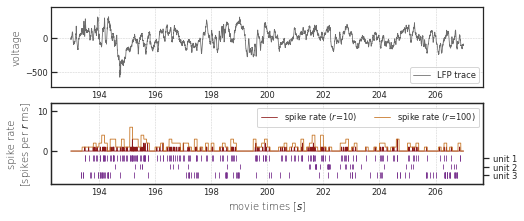

In [10]:
#csc_nrs = df_lfps["csc_nr"].to_numpy()   # all channels

fig3 = pltr.plot_LPF_spike_data(
    lfp_dt, 
    spikes_dt,
    [1,2,3],
    spike_rates,
    193000, 
    207000, 
    movie_times    
)
plt.subplots_adjust(
    left=0.1, right=0.9, top=0.97, bottom=0.15
)
fig3.savefig('plots/plot2.png')
fig3.savefig('plots/plot2.pdf')